
# Logistic Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

### Import data

In [3]:
#read the data
df = pd.read_csv('conversion_data.csv')

In [4]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [5]:
#sneak peek into the data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
#more details about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              48303 non-null  object
 1   age                  48303 non-null  int64 
 2   new_user             48303 non-null  int64 
 3   source               48303 non-null  object
 4   total_pages_visited  48303 non-null  int64 
 5   converted            48303 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [7]:
#target class frequency
df.converted.value_counts()

0    46741
1     1562
Name: converted, dtype: int64

In [8]:
10200/(306000+10200)

0.03225806451612903

### Preparing Data For Modeling

In [9]:
#dummy data for categorical variables
df = pd.get_dummies(df, columns=['country','source'])

In [10]:
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  48303 non-null  int64
 1   new_user             48303 non-null  int64
 2   total_pages_visited  48303 non-null  int64
 3   converted            48303 non-null  int64
 4   country_China        48303 non-null  uint8
 5   country_Germany      48303 non-null  uint8
 6   country_UK           48303 non-null  uint8
 7   country_US           48303 non-null  uint8
 8   source_Ads           48303 non-null  uint8
 9   source_Direct        48303 non-null  uint8
 10  source_Seo           48303 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 1.8 MB


In [12]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print (input_columns)
print (output_column)

['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']
converted


In [13]:
#input data
X = df.loc[:,input_columns].values
#output data 
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(48303, 10) (48303,)


### Modeling : Logistic Regression

In [14]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)


In [17]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(33812, 10)
(33812,)
(14491, 10)
(14491,)


In [18]:
y_train.value_counts()

0    32719
1     1093
Name: converted, dtype: int64

In [16]:
y_test.value_counts()

0    14022
1      469
Name: converted, dtype: int64

In [19]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

1093
469


### Model Training

In [20]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

### Model Evaluation

**Classification accuracy:** percentage of correct predictions

In [22]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9862770613983202
0.986060313297909


In [23]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8421276775063226
0.8330788596293549


**Confusion Matrix Basics**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [24]:
train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_TP = train_confusion[1, 1]
train_TN = train_confusion[0, 0]
train_FP = train_confusion[0, 1]
train_FN = train_confusion[1, 0]

In [25]:
test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_TP = test_confusion[1, 1]
test_TN = test_confusion[0, 0]
test_FP = test_confusion[0, 1]
test_FN = test_confusion[1, 0]

Target -  If user converted or not

0 - user not converted

1 - converted

Actuals:

0 - 214200

1 - 7140

predictions:

0 - 213355

1 - 4910

In [27]:
213355+845

214200

In [28]:
2230+4910

7140

In [31]:
print(train_confusion)

[[32596   123]
 [  341   752]]


In [30]:
print(test_confusion)

[[13975    47]
 [  155   314]]


**True and False Positive Rates**

- **True Positive Rate (tpr):** When the actual value is positive, how often is the prediction correct?

                           tpr = TP / FN + TP
   

- **False Positive Rate (fpr):** When the actual value is negative, how often is the prediction incorrect?

                           fpr = FP / TN + FP

In [33]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred)

In [34]:
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred)

No handles with labels found to put in legend.


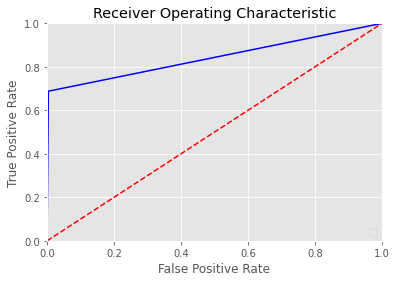

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()